# Trabajo 1: Introducción a las redes neuronales con TensorFlow y Keras

En este primer trabajo, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

![image.png](attachment:image.png)

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [1]:
# Make sure this is reproducable
import numpy as np
np.random.seed(4422)

from tensorflow import set_random_seed
set_random_seed(9090)

In [2]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

Using TensorFlow backend.


Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

** Pregunta 1.1 *(0.5 puntos)* ** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [5]:
### Tu código aquí ###
print('# training images {}'.format(x_train.shape[0]))
print('# test images {}'.format(x_test.shape[0]))
print('training images size {}'.format(x_train.shape[1:]))

# training images 60000
# test images 10000
training images size (28, 28)


**Pregunta 1.2 *(0.5 puntos)* ** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [6]:
### Tu código aquí ###
print('The training data contains 28*28 pixels of type {} values between {} and {} for each image.'.format(x_test.dtype, x_test[0].min(), x_test[0].max()))
print('Each image is associated with a single class, have one of {} labels'.format(set(y_test)))

The training data contains 28*28 pixels of type float64 values between 0.0 and 1.0 for each image.
Each image is associated with a single class, have one of {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} labels


*Tu respuesta aquí*

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [7]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.axis('off')
    plt.show()

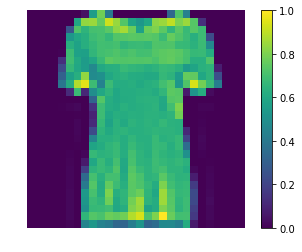

In [8]:
visualize_example(x_train[10])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(7 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [9]:
from keras.utils import to_categorical

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# FFN
Fully connected feed forward NN

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
#create model

BS=64

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])
# train model
history = model.fit(x_train, y_train, epochs=1, batch_size=BS, verbose=2, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 2s - loss: 2.1932 - acc: 0.3900 - val_loss: 2.0309 - val_acc: 0.5004


# CNN Model
Just for testing, is not used for the exercise

In [12]:
from keras.layers import Conv2D, Flatten

# Convert to single channel images
x_train_single = x_train.reshape(60000, 28, 28, 1)
x_test_single = x_test.reshape(10000, 28, 28, 1)

#create model
model_cnn = Sequential()
model_cnn.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(28,28, 1)))
model_cnn.add(Conv2D(64, kernel_size=3, activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(10, activation='softmax'))

In [14]:
# Compile model
model_cnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])
# train model
history = model_cnn.fit(x_train_single, y_train, epochs=8, batch_size=BS, verbose=2, validation_data=(x_test_single, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
 - 11s - loss: 0.7540 - acc: 0.7410 - val_loss: 0.6503 - val_acc: 0.7756
Epoch 2/8
 - 10s - loss: 0.5174 - acc: 0.8175 - val_loss: 0.5444 - val_acc: 0.8026
Epoch 3/8
 - 10s - loss: 0.4605 - acc: 0.8397 - val_loss: 0.4561 - val_acc: 0.8392
Epoch 4/8
 - 10s - loss: 0.4193 - acc: 0.8538 - val_loss: 0.4312 - val_acc: 0.8501
Epoch 5/8
 - 10s - loss: 0.3898 - acc: 0.8638 - val_loss: 0.4751 - val_acc: 0.8174
Epoch 6/8
 - 10s - loss: 0.3674 - acc: 0.8707 - val_loss: 0.3845 - val_acc: 0.8633
Epoch 7/8
 - 10s - loss: 0.3503 - acc: 0.8766 - val_loss: 0.4099 - val_acc: 0.8527
Epoch 8/8
 - 10s - loss: 0.3363 - acc: 0.8804 - val_loss: 0.3951 - val_acc: 0.8540


## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(1 punto)* **. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [15]:
### Tu código aquí ###
score = model.evaluate(x_test_flat, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5876054244995117
Test accuracy: 0.7845


**Pregunta 3.2 *(1 punto)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [16]:
prediction = model.predict(x_test_flat)

The prediction contains an array of 10 elements per sample, indicating the 'probability' of belonging to that class

In [17]:
print(prediction[0])

[5.3383086e-05 7.7273697e-05 1.7262371e-04 1.0021733e-03 1.5283888e-04
 1.8514517e-01 1.7083614e-04 2.6829463e-01 1.3332398e-02 5.3159863e-01]


Extract the most likely class for each sample

In [18]:
predicted_class = np.argmax(prediction, axis=1)
print(predicted_class)

[9 2 1 ... 8 1 5]


*Tu respuesta aquí*